In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the Glass dataset
data = pd.read_excel('glass.xlsx') 

# Task 1: Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())

# Check for missing values
print("Missing values:")
print(data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

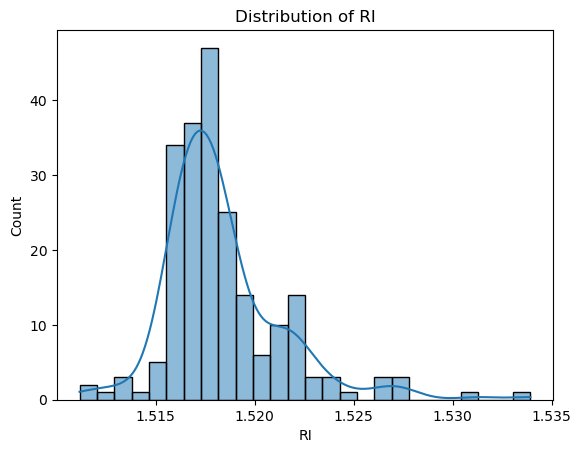

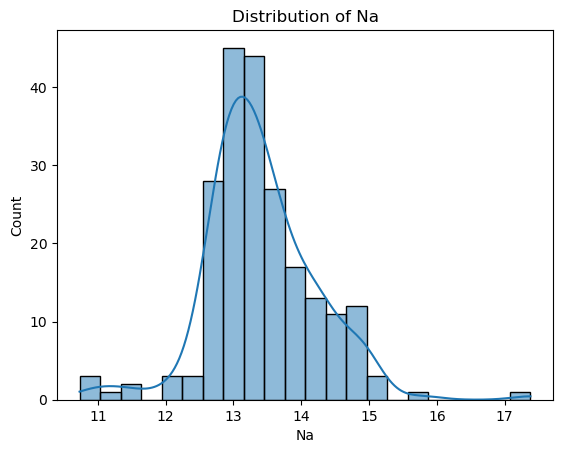

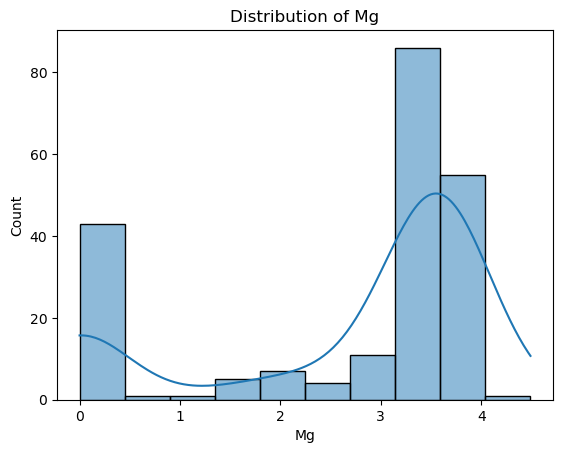

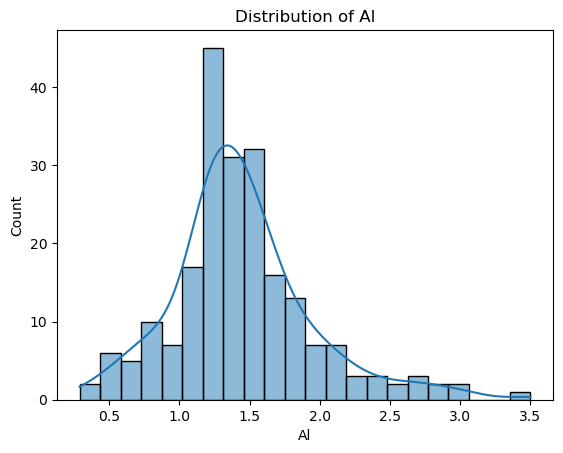

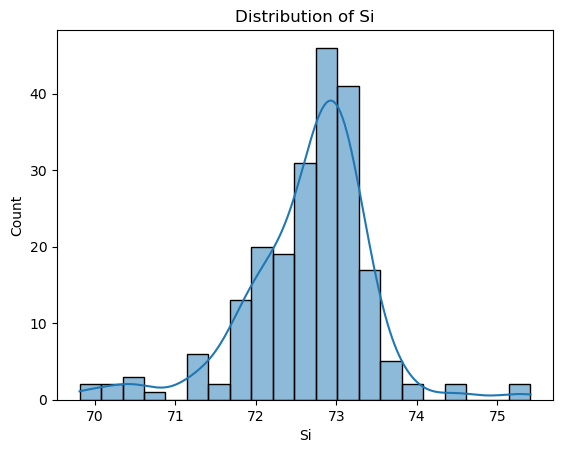

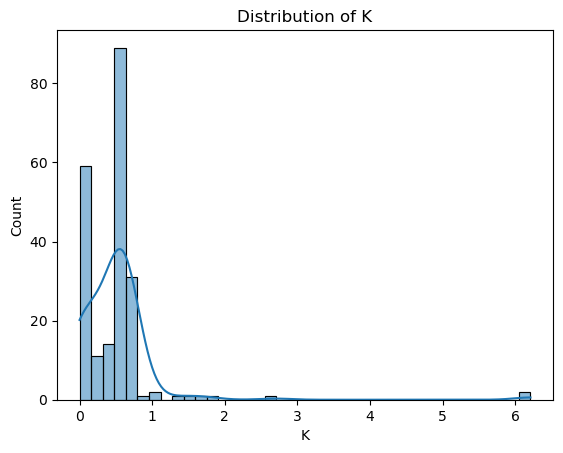

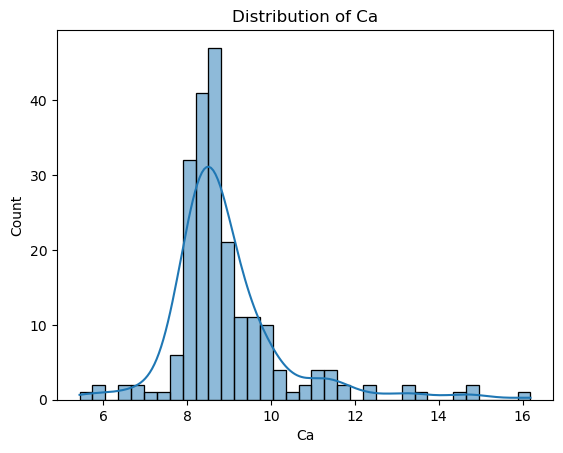

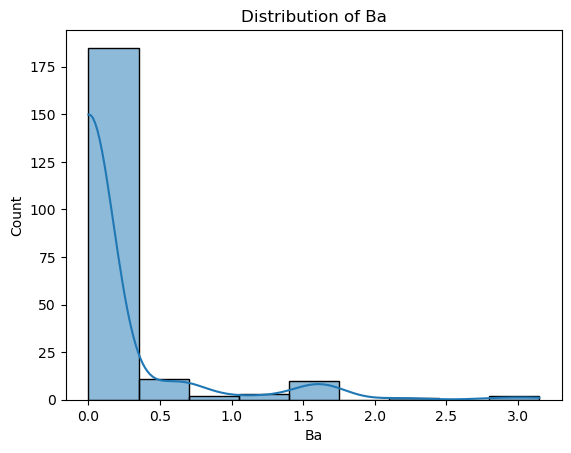

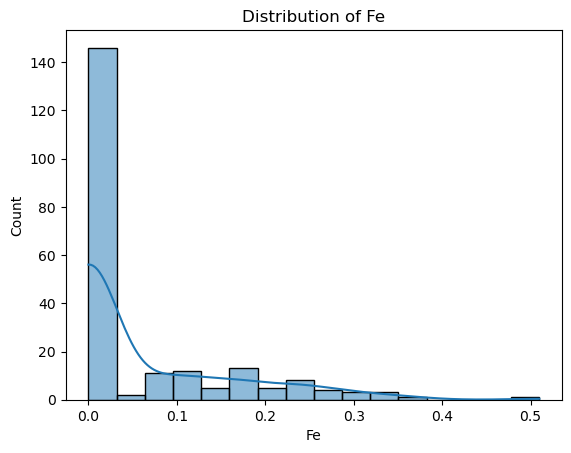

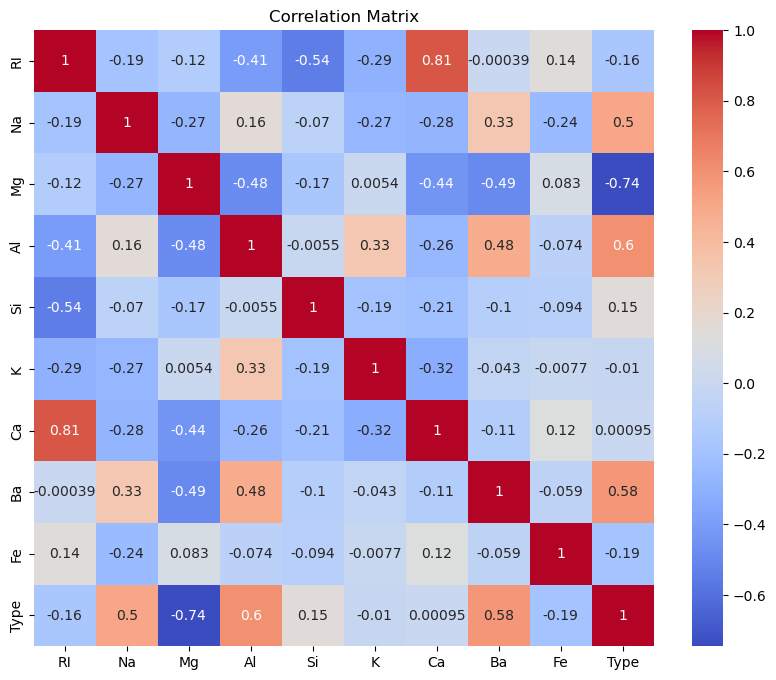

In [3]:
# Visualize distributions and correlations
for column in data.columns[:-1]:  # Exclude the target column
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [6]:
# Task 2: Data Preprocessing
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)  # Replace missing values with column means

# Separate features and target

y = data['Type']
X = data.drop('Type', axis=1)


# # Handle imbalanced data
# smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [7]:
# Task 3: Random Forest Model Implementation
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)



In [8]:
# Evaluate Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [11]:
# Task 4: Bagging and Boosting
# Bagging with Random Forest
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
print("Bagging Classification Report:")
print(classification_report(y_test, bagging_pred))



Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       0.75      0.75      0.75         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         8

    accuracy                           0.84        43
   macro avg       0.86      0.84      0.83        43
weighted avg       0.86      0.84      0.83        43



In [12]:
# Boosting with AdaBoost
boosting_model = AdaBoostClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
print("Boosting Classification Report:")
print(classification_report(y_test, boosting_pred))

C:\Users\punee\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43



C:\Users\punee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
print(" Additional Notes")
print("1. Bagging vs Boosting:")
print("- Bagging (Bootstrap Aggregating): Combines predictions from multiple models (usually the same type) by training them on different subsets of data sampled with replacement. Reduces variance and prevents overfitting.")
print("- Boosting: Sequentially trains models, each correcting errors of the previous one. Focuses on reducing bias and improving accuracy. Examples include AdaBoost and Gradient Boosting.")
print("*************************************************************************************")
print(" 2. Handling Imbalanced Data:")
print("- Use techniques like oversampling (e.g., SMOTE), undersampling, or class weighting to balance the dataset.")
print("- Evaluate performance with metrics like precision, recall, and F1-score instead of accuracy alone when dealing with imbalanced data.")


 Additional Notes
1. Bagging vs Boosting:
- Bagging (Bootstrap Aggregating): Combines predictions from multiple models (usually the same type) by training them on different subsets of data sampled with replacement. Reduces variance and prevents overfitting.
- Boosting: Sequentially trains models, each correcting errors of the previous one. Focuses on reducing bias and improving accuracy. Examples include AdaBoost and Gradient Boosting.
*************************************************************************************
 2. Handling Imbalanced Data:
- Use techniques like oversampling (e.g., SMOTE), undersampling, or class weighting to balance the dataset.
- Evaluate performance with metrics like precision, recall, and F1-score instead of accuracy alone when dealing with imbalanced data.
